In [4]:
import pandas as pd

In [5]:
data = df

In [6]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\Data Sci Assignments\PCA\wine.csv")

In [7]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [9]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

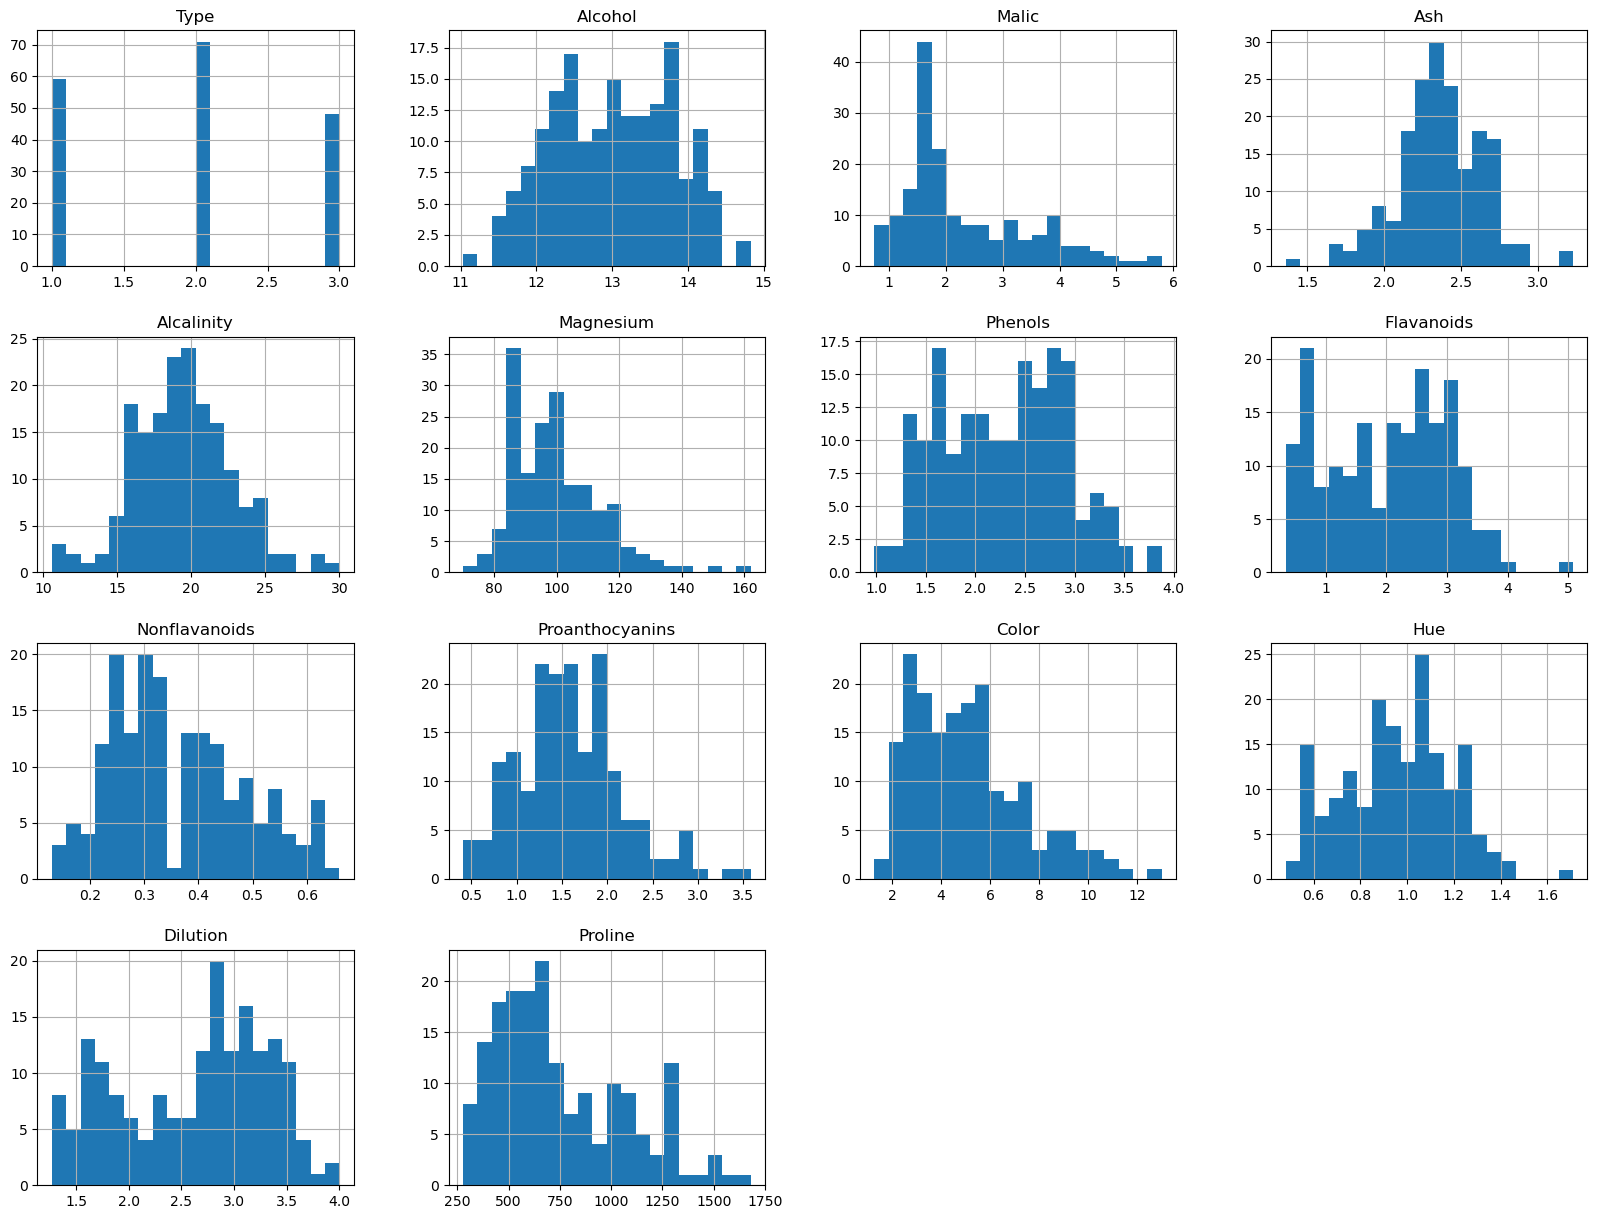

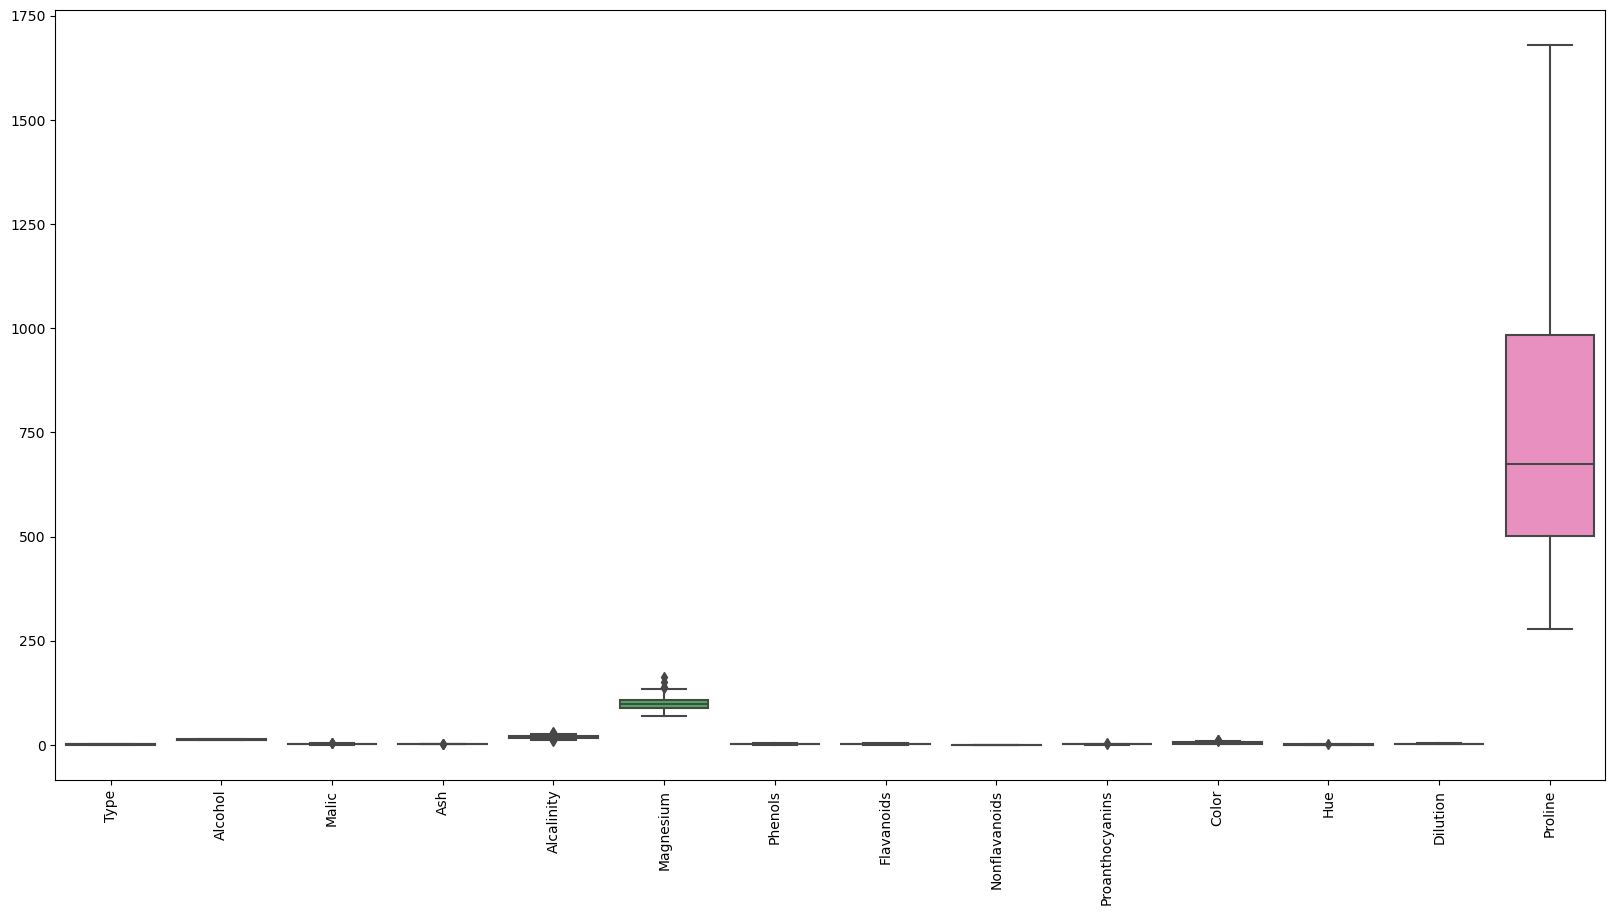

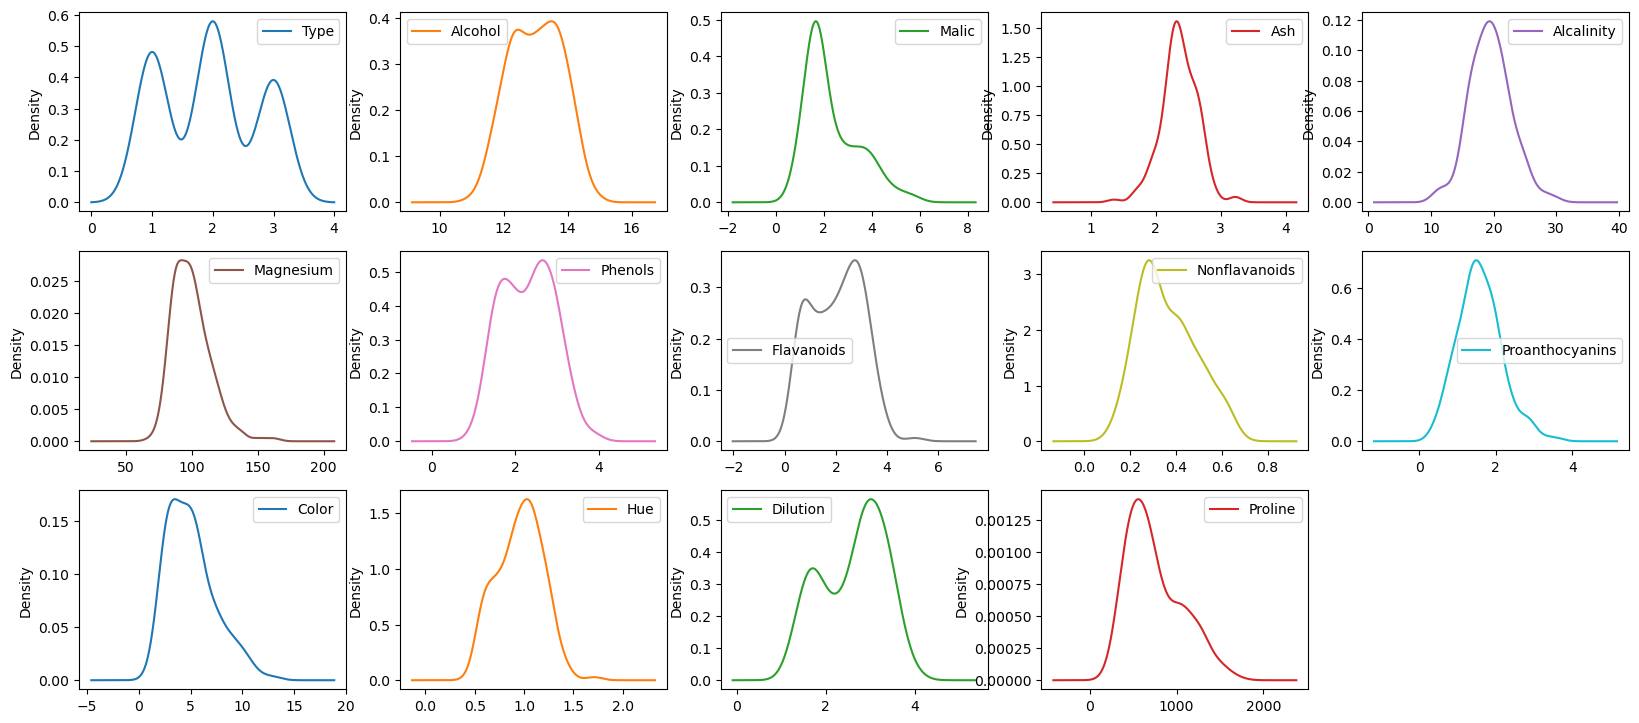

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Density plots
df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize=(20, 15))
plt.show()


                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

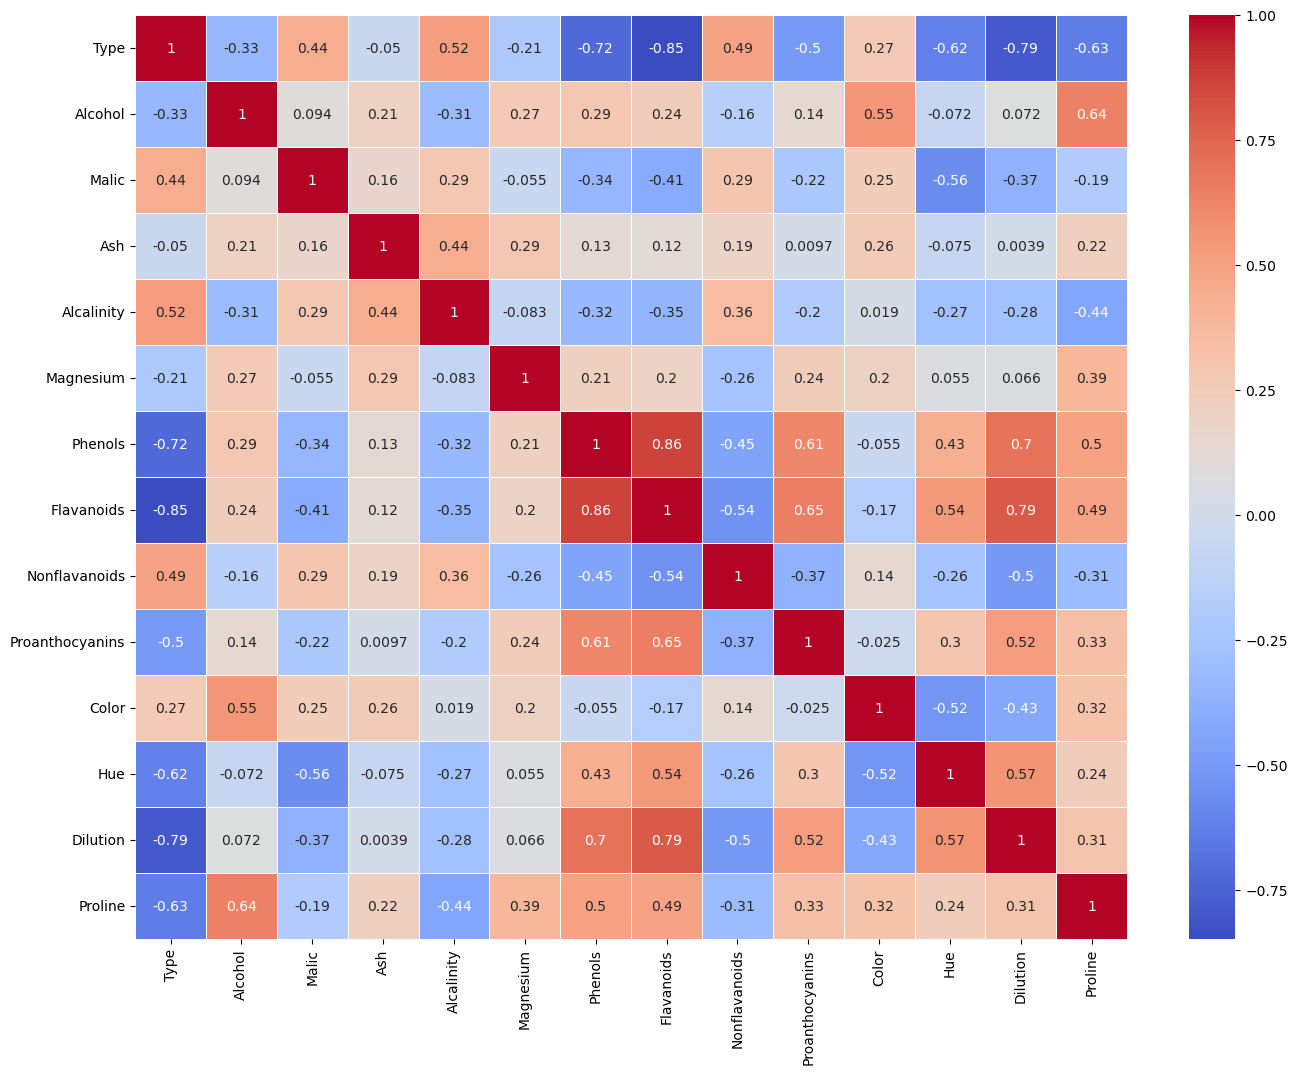

In [11]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


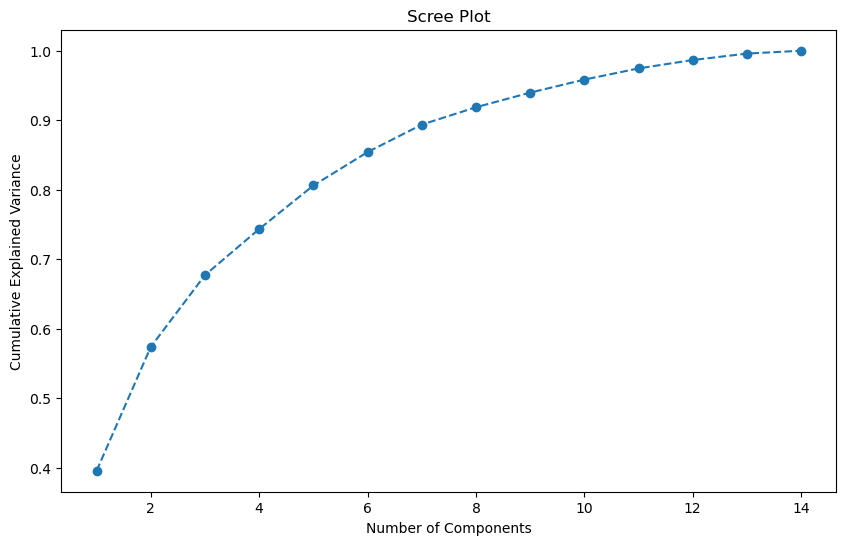

In [13]:
from sklearn.decomposition import PCA

# Implement PCA
pca = PCA()
pca.fit(scaled_df)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [14]:
# Determine optimal number of components (for example, choosing 2 components for simplicity)
optimal_components = 2
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pc_df.head())


        PC1       PC2
0 -3.522934 -1.453098
1 -2.528858  0.330019
2 -2.785029 -1.036936
3 -3.922588 -2.768210
4 -1.407511 -0.867773


In [15]:
from sklearn.cluster import KMeans

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)
original_labels = kmeans.labels_


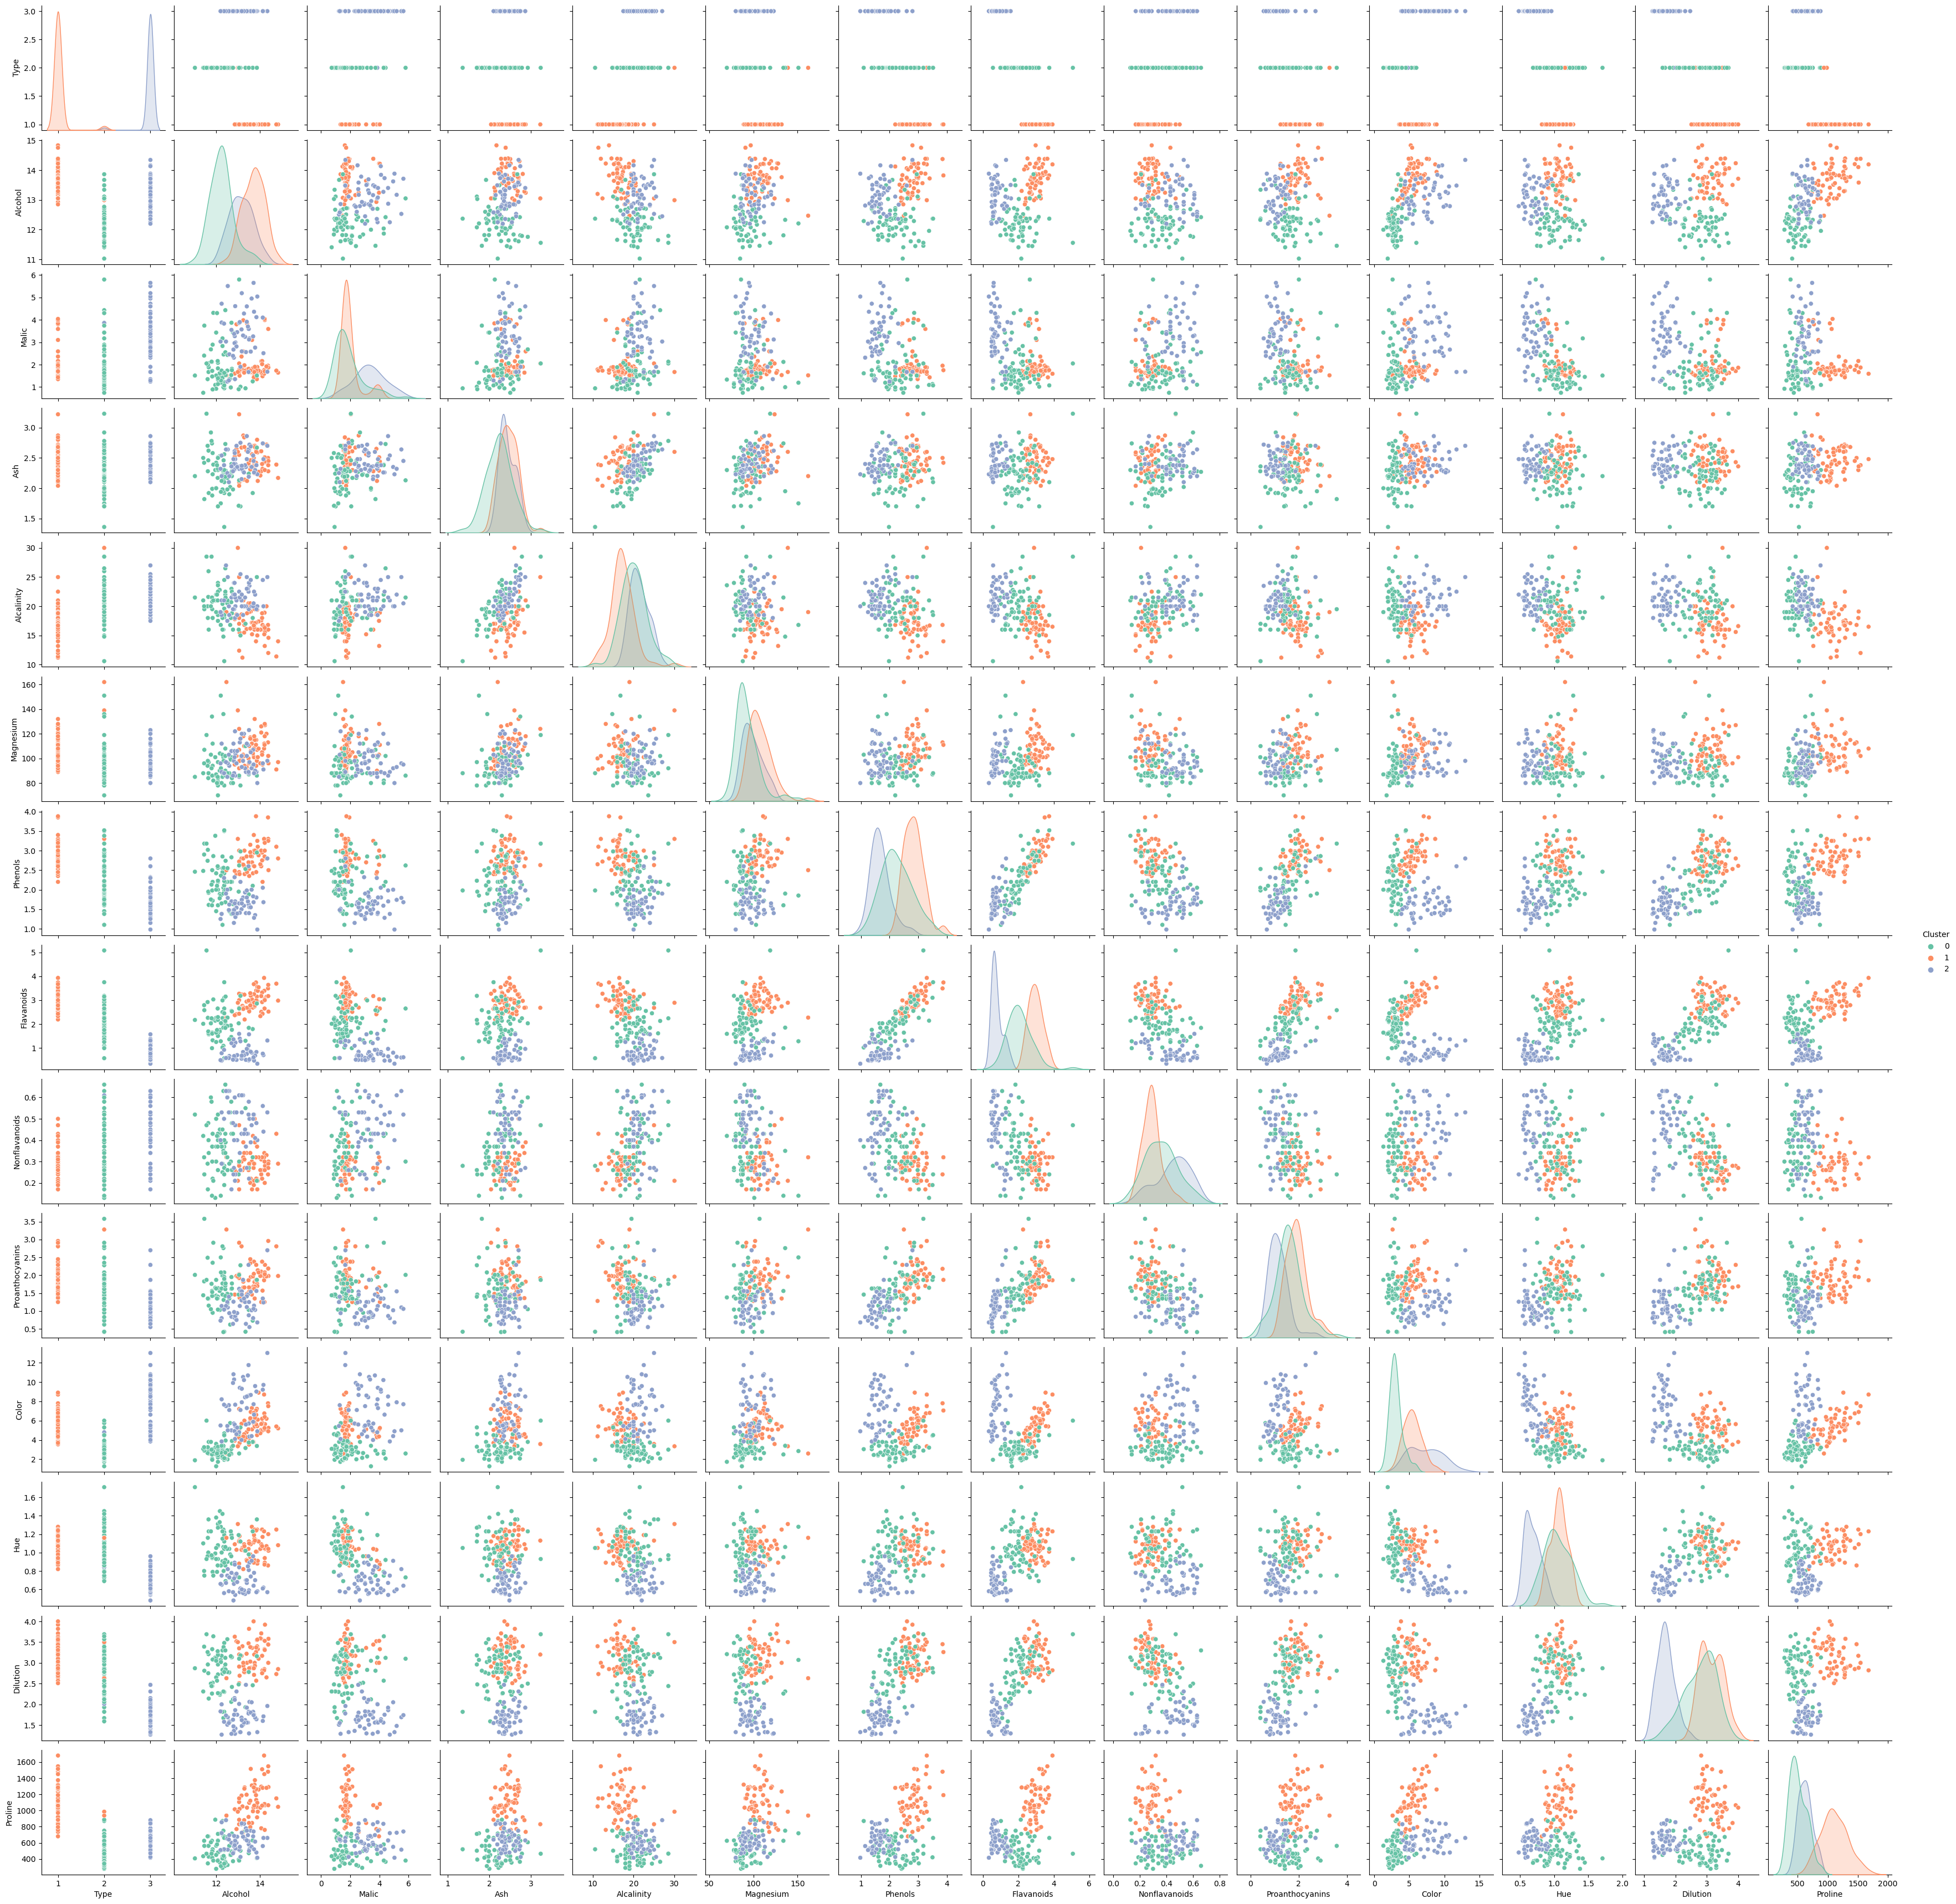

In [16]:
# Add cluster labels to the original DataFrame
df['Cluster'] = original_labels

# Pair plot
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

# Silhouette score
silhouette_avg = silhouette_score(scaled_df, original_labels)
print(f'Silhouette Score for original data: {silhouette_avg}')


Silhouette Score for original data: 0.30773604383565206


In [18]:
# Apply K-means to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pc_df)
pca_labels = kmeans_pca.labels_


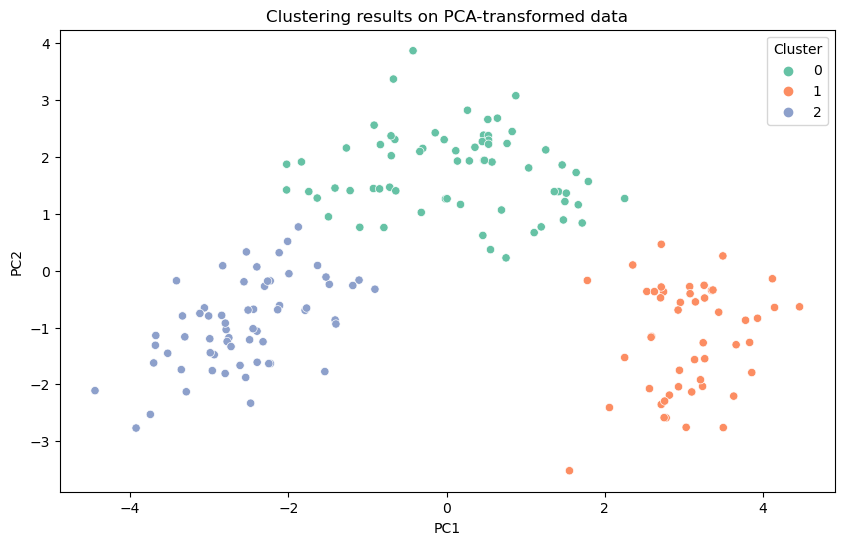

In [19]:
# Add cluster labels to the PCA DataFrame
pc_df['Cluster'] = pca_labels

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='Set2')
plt.title('Clustering results on PCA-transformed data')
plt.show()


In [20]:
# Silhouette score for PCA-transformed data
silhouette_pca = silhouette_score(pc_df.iloc[:, :-1], pca_labels)
print(f'Silhouette Score for PCA-transformed data: {silhouette_pca}')


Silhouette Score for PCA-transformed data: 0.6024415520362845


In [21]:
###1. Compare the clustering results obtained from the original dataset and PCA-transformed data
###Let's compare the silhouette scores and visualizations.

##Silhouette Scores:

#Original Data:
#Silhouette Score: 0.30773604383565206
#PCA-Transformed Data:
#Silhouette Score: 0.6024415520362845

##Visualizations:

#Original Data:
#The clusters might be more spread out and less distinct in the higher-dimensional space.
#PCA-Transformed Data:
#The clusters are more compact and well-separated, indicating a clearer cluster structure in the reduced-dimensional space.

###2. Discuss any similarities or differences observed in the clustering results

##Similarities:

#The overall structure and number of clusters remained consistent between the original and PCA-transformed datasets.
#Both methods were able to identify distinct clusters in the data.

##Differences:

#The silhouette score is significantly higher for the PCA-transformed data, indicating better-defined and more cohesive clusters.
#The PCA-transformed data provided more distinct and interpretable clusters, which suggests that PCA helped in highlighting the core structure of the data and reducing noise.

###3. Reflect on the impact of dimensionality reduction on clustering performance

##Impact:

#Dimensionality Reduction: PCA helped in reducing the dataset's dimensionality, retaining the most significant variance while filtering out noise and redundant features. This improvement in data quality led to better clustering performance.
#Clustering Performance: The significantly higher silhouette score for the PCA-transformed data demonstrates that PCA enhanced the clustering algorithm's ability to form well-defined and cohesive clusters. The clusters formed in the PCA space are more interpretable and distinct.

###4. Analyze the trade-offs between using PCA and clustering directly on the original dataset
###Trade-offs:

##Using PCA:

#Advantages:
#Reduces the dataset's dimensionality, making it easier to visualize and interpret.
#Removes noise and redundant features, improving clustering performance.
#Makes computations more efficient, especially for large datasets.
#Provides clearer and more distinct clusters, as evidenced by the higher silhouette score.

#Disadvantages:
#Some information might be lost during the dimensionality reduction process, which could impact the results in cases where the lost information is crucial.
#The principal components may not have straightforward interpretations.

##Clustering on Original Data:

#Advantages:
#Utilizes the full dimensionality of the data, preserving all information.
#May capture more intricate patterns and relationships between features.

#Disadvantages:
#Higher dimensionality can lead to more noise and redundant features, complicating the clustering process.
#Visualization and interpretation become challenging with higher dimensions.
#Lower silhouette score indicates less well-defined clusters.

In [22]:
#CONCLUSION
#PCA improved clustering performance, evident from a higher silhouette score (0.602) compared to the original data (0.308). It enhanced cluster clarity by reducing noise and dimensionality. Use PCA for high-dimensional, noisy datasets, and direct clustering for low-dimensional, clean data.
